In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.stats import kurtosis
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

from src.utils.HTMLParser import HTMLParser
from src.data.data_loader import *
from src.utils.helpers import *
from src.models.networks import *

parser = HTMLParser()
parser.load_pickle()

In [5]:
import config

In [6]:
# Load and preprocess the data
df_article_names, df_html_stats, df_categories, df_links, df_shortest_path, df_unfinished, df_finished, df_article = read_all()

Unfinished Paths
---------------- 
Number of rows before filtering: 24875
Invalid target articles found: {'Bogota', 'Western Australia', 'Test', 'Fats', 'Podcast', ' Zebra', 'Rat', 'Usa', 'Netbook', 'Rss', 'Pikachu', 'The Rock', 'Black ops 2', 'Kashmir', 'Charlottes web', 'The', 'Macedonia', 'English', 'Sportacus', 'Mustard', 'Adolph Hitler', 'Great', 'Christmas', 'Georgia', 'Long peper'}
Invalid articles found in path: {'Private Peaceful', 'Pikachu', 'Wikipedia Text of the GNU Free Documentation License', 'Local community', 'Osteomalacia'}
Number of 'timeout' games with a duration of less than 30 minutes: 7
Number of rows after filtering: 24709 

Finished Paths
-------------- 
Number of rows before filtering: 51318
Invalid articles found in path: {'Pikachu', 'Wikipedia Text of the GNU Free Documentation License', 'Local community', 'Osteomalacia'}
Number of rows after filtering: 51196


In [7]:
labels_filtered, parents_filtered, values_filtered, ids_filtered = create_treemap_data(df_categories, show_articles=True)
cat_fig = create_colored_treemap(labels_filtered, parents_filtered, values_filtered, ids_filtered, title="Category Distribution in Articles (Only the most specific category is shown for each article)")

In [8]:
cat_fig.write_html("treemap.html")

In [30]:
df_categories_original = read_categories()
labels, parents, values, ids = create_treemap_data(df_categories_original, show_articles=True)

create_colored_treemap(labels, parents, values, ids,color_palette=config.PALETTE_CATEGORY_DICT, title="Category Distribution in Articles (Only the most specific category is shown for each article)")
print(f'We have {df_categories_original["level_1"].unique().size} distinct level 1 categories.')

We have 15 distinct level 1 categories.


### Extract colors form html fragment of the plot treemap

In [23]:
text = ""","type":"treemap"}],                        {"template":{"data":{"histogram2dcontour":[{"type":"histogram2dcontour","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"choropleth":[{"type":"choropleth","colorbar":{"outlinewidth":0,"ticks":""}}],"histogram2d":[{"type":"histogram2d","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"heatmap":[{"type":"heatmap","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"heatmapgl":[{"type":"heatmapgl","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"contourcarpet":[{"type":"contourcarpet","colorbar":{"outlinewidth":0,"ticks":""}}],"contour":[{"type":"contour","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"surface":[{"type":"surface","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"mesh3d":[{"type":"mesh3d","colorbar":{"outlinewidth":0,"ticks":""}}],"scatter":[{"fillpattern":{"fillmode":"overlay","size":10,"solidity":0.2},"type":"scatter"}],"parcoords":[{"type":"parcoords","line":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterpolargl":[{"type":"scatterpolargl","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"bar":[{"error_x":{"color":"#2a3f5f"},"error_y":{"color":"#2a3f5f"},"marker":{"line":{"color":"#E5ECF6","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"bar"}],"scattergeo":[{"type":"scattergeo","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterpolar":[{"type":"scatterpolar","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"histogram":[{"marker":{"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"histogram"}],"scattergl":[{"type":"scattergl","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatter3d":[{"type":"scatter3d","line":{"colorbar":{"outlinewidth":0,"ticks":""}},"marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scattermapbox":[{"type":"scattermapbox","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterternary":[{"type":"scatterternary","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scattercarpet":[{"type":"scattercarpet","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"carpet":[{"aaxis":{"endlinecolor":"#2a3f5f","gridcolor":"white","linecolor":"white","minorgridcolor":"white","startlinecolor":"#2a3f5f"},"baxis":{"endlinecolor":"#2a3f5f","gridcolor":"white","linecolor":"white","minorgridcolor":"white","startlinecolor":"#2a3f5f"},"type":"carpet"}],"table":[{"cells":{"fill":{"color":"#EBF0F8"},"line":{"color":"white"}},"header":{"fill":{"color":"#C8D4E3"},"line":{"color":"white"}},"type":"table"}],"barpolar":[{"marker":{"line":{"color":"#E5ECF6","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"barpolar"}],"pie":[{"automargin":true,"type":"pie"}]},"layout":{"autotypenumbers":"strict","colorway":["#636efa","#EF553B","#00cc96","#ab63fa","#FFA15A","#19d3f3","#FF6692","#B6E880","#FF97FF","#FECB52"],"font":{"color":"#2a3f5f"},"hovermode":"closest","hoverlabel":{"align":"left"},"paper_bgcolor":"white","plot_bgcolor":"#E5ECF6","polar":{"bgcolor":"#E5ECF6","angularaxis":{"gridcolor":"white","linecolor":"white","ticks":""},"radialaxis":{"gridcolor":"white","linecolor":"white","ticks":""}},"ternary":{"bgcolor":"#E5ECF6","aaxis":{"gridcolor":"white","linecolor":"white","ticks":""},"baxis":{"gridcolor":"white","linecolor":"white","ticks":""},"caxis":{"gridcolor":"white","linecolor":"white","ticks":""}},"coloraxis":{"colorbar":{"outlinewidth":0,"ticks":""}},"colorscale":{"sequential":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"sequentialminus":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"diverging":[[0,"#8e0152"],[0.1,"#c51b7d"],[0.2,"#de77ae"],[0.3,"#f1b6da"],[0.4,"#fde0ef"],[0.5,"#f7f7f7"],[0.6,"#e6f5d0"],[0.7,"#b8e186"],[0.8,"#7fbc41"],[0.9,"#4d9221"],[1,"#276419"]]},"xaxis":{"gridcolor":"white","linecolor":"white","ticks":"","title":{"standoff":15},"zerolinecolor":"white","automargin":true,"zerolinewidth":2},"yaxis":{"gridcolor":"white","linecolor":"white","ticks":"","title":{"standoff":15},"zerolinecolor":"white","automargin":true,"zerolinewidth":2},"scene":{"xaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2},"yaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2},"zaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2}},"shapedefaults":{"line":{"color":"#2a3f5f"}},"annotationdefaults":{"arrowcolor":"#2a3f5f","arrowhead":0,"arrowwidth":1},"geo":{"bgcolor":"white","landcolor":"#E5ECF6","subunitcolor":"white","showland":true,"showlakes":true,"lakecolor":"white"},"title":{"x":0.05},"mapbox":{"style":"light"}}},"margin":{"t":50,"l":10,"r":10,"b":5},"title":{"text":"Category Distribution in Articles (Only the most specific category is shown for each article)"}},                        {"responsive": true}                    )                };                            </script>        </div>
</body>
</html>"""

In [24]:
import re

def extract_color_codes(text):
    """
    Extract all unique color codes (hex format) from the given text.
    
    Parameters:
        text (str): The input text containing color codes.
    
    Returns:
        list: A list of unique color codes found in the text.
    """
    # Regular expression to match hex color codes
    color_code_pattern = r"#(?:[0-9a-fA-F]{3}){1,2}"
    
    # Find all matches
    color_codes = re.findall(color_code_pattern, text)
    
    # Return unique color codes
    return list(set(color_codes))

# Example usage

color_codes = extract_color_codes(text)
print(color_codes)

['#fde0ef', '#2a3f5f', '#46039f', '#276419', '#fb9f3a', '#EF553B', '#f0f921', '#8e0152', '#d8576b', '#7fbc41', '#FF6692', '#f7f7f7', '#ab63fa', '#B6E880', '#0d0887', '#ed7953', '#FFA15A', '#C8D4E3', '#19d3f3', '#7201a8', '#00cc96', '#EBF0F8', '#636efa', '#bd3786', '#4d9221', '#FECB52', '#de77ae', '#e6f5d0', '#b8e186', '#E5ECF6', '#FF97FF', '#c51b7d', '#9c179e', '#f1b6da', '#fdca26']


In [25]:
unique_color_codes = list(set(color_codes))
len(unique_color_codes)

35

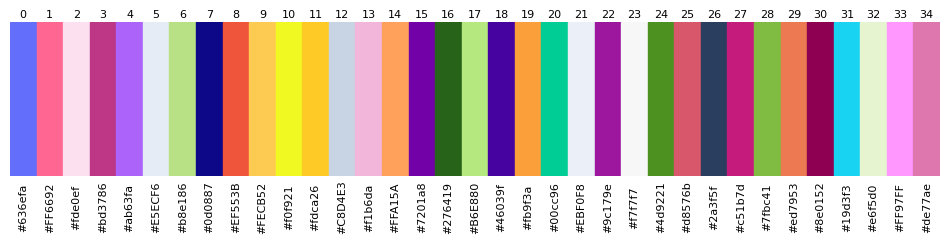

In [27]:
import matplotlib.pyplot as plt

# List of color codes
color_codes = ['#636efa', '#FF6692', '#fde0ef', '#bd3786', '#ab63fa', '#E5ECF6', '#b8e186', '#0d0887',
               '#EF553B', '#FECB52', '#f0f921', '#fdca26', '#C8D4E3', '#f1b6da', '#FFA15A', '#7201a8',
               '#276419', '#B6E880', '#46039f', '#fb9f3a', '#00cc96', '#EBF0F8', '#9c179e', '#f7f7f7',
               '#4d9221', '#d8576b', '#2a3f5f', '#c51b7d', '#7fbc41', '#ed7953', '#8e0152', '#19d3f3',
               '#e6f5d0', '#FF97FF', '#de77ae']

# Number of colors
num_colors = len(color_codes)

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 2))

# Create a swatch for each color
for i, color in enumerate(color_codes):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Set axis limits and remove ticks
ax.set_xlim(0, num_colors)
ax.set_ylim(0, 1)
ax.axis('off')

# Add color hex codes and indices as labels
for i, color in enumerate(color_codes):
    ax.text(i + 0.5, -0.2, color, ha='center', va='center', fontsize=8, rotation=90)  # Color hex
    ax.text(i + 0.5, 1.05, str(i), ha='center', va='center', fontsize=8)  # Index

# Show the plot
plt.show()


In [32]:
# List of indices specifying the desired order
indices = [0,1,3,4,6,9,14,16,20,28,32,33,31,26,18,12,11]

# make print if the index are duplicated
from collections import Counter
print([k for k,v in Counter(indices).items() if v>1])

# Generate the formatted output
formatted_output = "# Colors for the categories\nCATEGORY_COLORS = [\n"
for i, index in enumerate(indices, start=1):
    formatted_output += f"    '{color_codes[index]}',  # Category {i}\n"
formatted_output += "]"

# Print the formatted output
print(formatted_output)

[]
# Colors for the categories
CATEGORY_COLORS = [
    '#636efa',  # Category 1
    '#FF6692',  # Category 2
    '#bd3786',  # Category 3
    '#ab63fa',  # Category 4
    '#b8e186',  # Category 5
    '#FECB52',  # Category 6
    '#FFA15A',  # Category 7
    '#276419',  # Category 8
    '#00cc96',  # Category 9
    '#7fbc41',  # Category 10
    '#e6f5d0',  # Category 11
    '#FF97FF',  # Category 12
    '#19d3f3',  # Category 13
    '#2a3f5f',  # Category 14
    '#46039f',  # Category 15
    '#C8D4E3',  # Category 16
    '#fdca26',  # Category 17
]


17


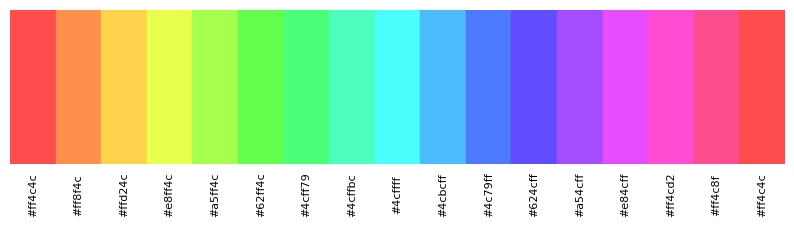

In [35]:
import colorsys
import numpy as np

h = np.linspace(0, 1, 17)

color_codes = []	
for i in h:

    r, g, b = colorsys.hsv_to_rgb(i, 0.7, 1)
    color_codes.append("#{:02x}{:02x}{:02x}".format(int(r * 255), int(g * 255), int(b * 255)))

# Number of colors
num_colors = len(color_codes)

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 2))

# Create a swatch for each color
for i, color in enumerate(color_codes):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Set axis limits and remove ticks
ax.set_xlim(0, num_colors)
print(num_colors)
ax.set_ylim(0, 1)
ax.axis('off')

# Add color hex codes as labels
for i, color in enumerate(color_codes):
    ax.text(i + 0.5, -0.2, color, ha='center', va='center', fontsize=8, rotation=90)

# Show the plot
plt.show()

In [34]:
from matplotlib.colors import to_rgb, rgb_to_hsv, hsv_to_rgb

# Given dictionary of categories and their corresponding colors
PALETTE_CATEGORY_DICT_COLORS = { 
    'Art': '#46039f',
    'Business Studies': '#FF6692',
    'Citizenship': '#ab63fa',
    'World Regions': '#00cc96',
    'Design and Technology': '#7fbc41',
    'Everyday life': '#FECB52',
    'Geography': '#b8e186',
    'History': '#FFA15A',
    'IT': '#bd3786',
    'Language and literature':  '#ff4c4c',
    'Mathematics': '#ccdbb6',
    'Music': '#FF97FF',
    'People': '#19d3f3',
    'Religion': '#2a3f5f',
    'Science': '#636efa',
    'Others': '#C8D4E3',
}

def adjust_color_saturation(hex_color: str, factor: float) -> str:
    """Helper function to adjust the saturation of a HEX color."""
    r, g, b = to_rgb(hex_color)
    h, s, v = rgb_to_hsv((r, g, b))
    r, g, b = [int(c * 255) for c in hsv_to_rgb((h, s, v * factor))]
    return f"#{r:02x}{g:02x}{b:02x}"

In [35]:
adjusted_palette = {
    category: adjust_color_saturation(color, 0.4) if category != "World Regions" else color
    for category, color in PALETTE_CATEGORY_DICT_COLORS.items()
}
adjusted_palette

{'Art': '#1c013f',
 'Business Studies': '#66283a',
 'Citizenship': '#442764',
 'World Regions': '#00cc96',
 'Design and Technology': '#324b1a',
 'Everyday life': '#655120',
 'Geography': '#495a35',
 'History': '#664024',
 'IT': '#4b1635',
 'Language and literature': '#661e1e',
 'Mathematics': '#515748',
 'Music': '#663c66',
 'People': '#095461',
 'Religion': '#101926',
 'Science': '#272b64',
 'Others': '#50545a'}